### Importing packages

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

### Loading velocity data stored in a Netcdf file using xarray

In [19]:

ds = xr.open_dataset("data/uv_data.nc").squeeze()
ds


## quiver plot using xarray

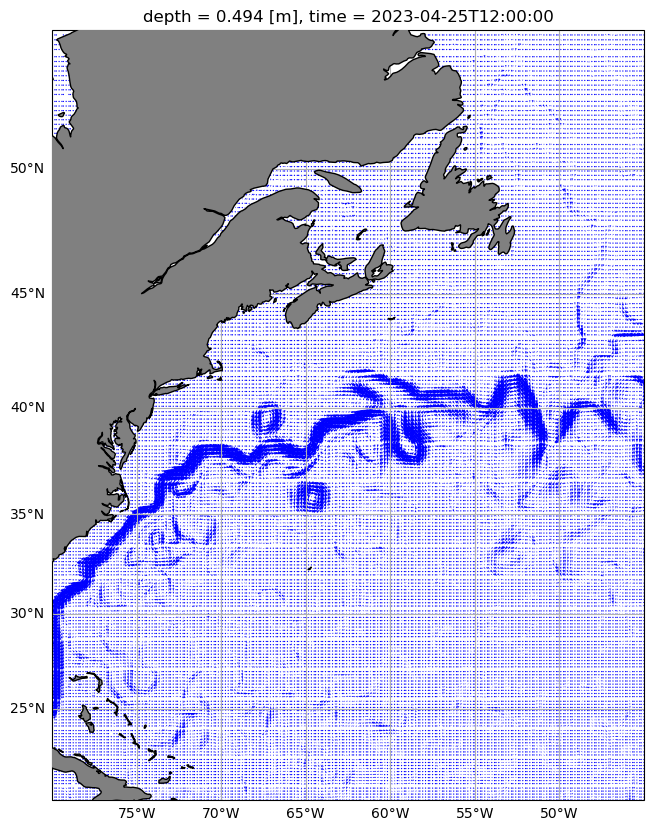

In [58]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0], projection=ccrs.Mercator())
ax.add_feature(cfeature.LAND, facecolor="gray", zorder=15, edgecolor="k")

lon_lim = [-80, -45]
lat_lim = [20, 55]


ax.set_extent([lon_lim[0], lon_lim[1], lat_lim[0], lat_lim[1]], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
gl.top_labels = False;gl.right_labels = False

ds1=ds.sel(latitude=np.linspace(lat_lim[0],lat_lim[1],200),longitude=np.linspace(lon_lim[0],lon_lim[1],250),method='nearest')

q = ds1.plot.quiver(
    ax=ax,
    x='longitude',
    y='latitude',
    u='uo',
    v='vo',
    color='b',
    transform=ccrs.PlateCarree()
)


